Convolutional Neural Network is a Deep Learning algorithm specially designed for working with Images and videos.
It takes images as inputs, extracts and learns the features of the image, and classifies them based on the learned features.



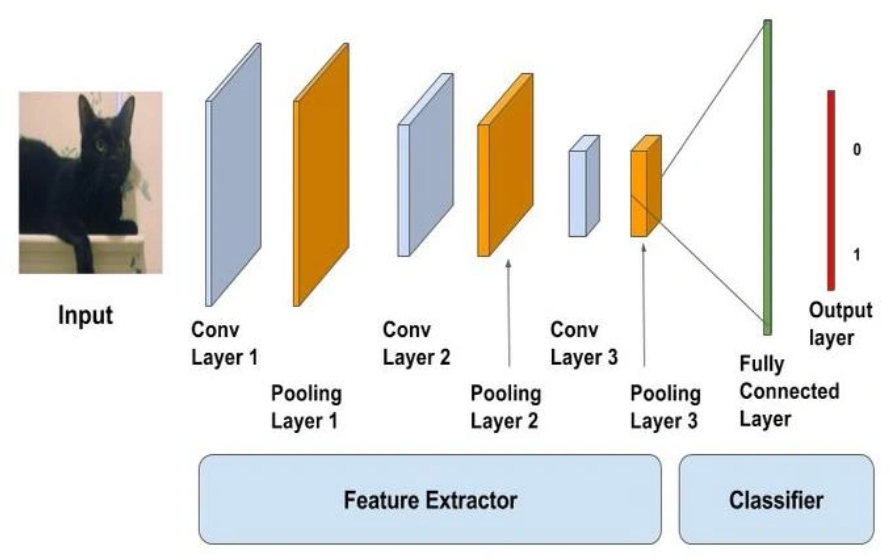

In [1]:
%pip install tensorflow


     -------------------------------------- 385.0/385.0 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 13.5 MB/s eta 0:00:00
     -------------------------------------- 126.6/126.6 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 15.1 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 16.0 MB/s eta 0:00:00
     --------------------------------------- 26.4/26.4 MB 14.9 MB/s eta 0:00:00
     ---------------------------------------- 4.4/4.4 MB 17.4 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 15.9 MB/s eta 0:00:00
     ------------------------------------- 274.7/274.7 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
   

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

Digit classification model

In [3]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


X_train.shape[0]: This refers to the number of images in the training set, i.e., the number of samples.

X_train.shape[1]: This refers to the height (number of rows) of each image.

X_train.shape[2]: This refers to the width (number of columns) of each image.

1: This is the number of channels. For grayscale images, there is only 1 channel (since they don't have separate Red, Green, and Blue channels like RGB images).

Reshape Function:
The reshape() function is used to change the shape of the dataset without altering the data itself.

In [4]:
#reshaping data
X_train = X_train.???????((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.???????((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [5]:
#checking for shape after the reshape

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
#normalizing pixel value

X_train=X_train/???
X_test=X_test/???

What is a Sequential Model?
The Sequential model is a linear stack of layers in which you can add layers one by one in a defined order. It’s a simple, easy-to-use model for building deep learning architectures.

In [7]:
#defining the model
model=Sequential()


model.add(...):

This function is used to add a layer to the Sequential model you created earlier. Each time you call add(), you append a new layer to the model.


Conv2D(...):

This is the constructor for a 2D convolutional layer. It is used in Convolutional Neural Networks (CNNs) to extract features from 2D data, such as images.

32: the numbers of filters in the convolutional layer

(3x3): This specifies the size of each filter.

activation="relu": The ReLU activation function outputs the input directly if it is positive; otherwise, it outputs zero. This helps introduce non-linearity into the model, allowing it to learn more complex patterns.


In [8]:
#adding convolutional layer

model.???(??????(32,(3,3),activation="relu",input_shape=(28,28,1)))

c:\Users\ruben\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MaxPool2D(2, 2):

This refers to a 2D Max Pooling layer. Max pooling is a down-sampling operation that reduces the spatial dimensions (height and width) of the input feature map while retaining the most important information (features) from that input.

In [9]:
#adding a pooling layer
model.add(?????????(2,2))

model.add(Flatten())

The Flatten layer is used to convert the multidimensional output (from the previous layers, usually a convolutional layer or pooling layer) into a 1D vector. This step is essential before connecting to fully connected (Dense) layers.

When you have a feature map from a convolutional or pooling layer, the data is typically in a 3D shape (for example, height x width x channels). The Flatten layer transforms this 3D tensor into a 1D array.


model.add(Dense())

The Dense layer (also known as a fully connected layer) connects every neuron from the previous layer to each neuron in the current layer. It is responsible for learning non-linear combinations of the features extracted by previous layers.

100: number of neurons in the dense layer.





In [12]:
#adding fully conected layer

model.add(???????())
model.add(?????(100,activation="relu"))

Softmax Function:

The softmax function takes a vector of raw class scores (logits) and squashes them to a range between 0 and 1, ensuring that the sum of all output probabilities equals 1. This allows you to interpret the output of the model as probabilities for each class.

In [13]:
#adding an output layer

model.add(Dense(10,activation="???????"))

In [15]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [16]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9120 - loss: 0.2969
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9838 - loss: 0.0536
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9891 - loss: 0.0339
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9937 - loss: 0.0211
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9952 - loss: 0.0154
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9969 - loss: 0.0103
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9975 - loss: 0.0075
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9974 - loss: 0.0076
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9981 - loss: 0.0059
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9986 - loss: 0.0042
